![](../assets/header_image.png)

# Optional Assignment 3: Introduction to ROS 


Welcome to the first Jupyter-ROS assignment! 
This exercise notebook is optional. That means we only recommend this notebook to students who do *not* have expierenced with
- **Robot Operating System (ROS)**
- **Jupyter-ROS**


In this assignment, you will

- **get a brief introduction to Jupyter-ROS (JupyROS) library**
- **learn how the JupyROS can allow us to use ROS with the Jupyter Notebooks**
- **and practice some basic ROS**


# Introduction to Jupyter-ROS

While the Jupyter ecosystem has been widely adopted by the Data Science and Machine Learning community, the robotics community has not jumped on the band wagon yet!

Most tools around ROS, the Robot Operating System, are built using Python and QT. However, using QT separates the user away from the code. 

[Quantstack](https://quantstack.net/) has built a set of ROS tools for Jupyter Notebooks called Jupyter-ROS (JupyROS) library, trying to promote a rich, interactive experience for Robotics developers utilizing the power of the Jupyter Notebooks.

Jupyter-ROS comes with many helpers to make ROS and rospy source code working inside a Jupyter Notebook. The jupyter-ros tool suite contains the following pieces:


- publishing and receiving messages from the notebook interface
- A 3D widget for inspecting the robot and sensors in 3D
- playing back bag files and other helpers


# Set up the ROS environment

The following command is used to set up the environment for ROS (Robot Operating System) Noetic distribution. It sets up various environment variables, such as `ROS_PACKAGE_PATH`, that are necessary for using ROS commands and accessing the packages and libraries included with the Noetic distribution. 

By sourcing this file, the user can use the ROS commands and work with the Noetic distribution without having to manually set the environment variables each time. 

In [ ]:
!source /opt/ros/noetic/setup.sh

# Adding the ROS python library path to the system's path variables

This code is used to add the path of the ROS Noetic distribution's python library to the system's path variable.
The sys.path variable is a list of strings that determines the interpreter's search path for modules. 
By appending the path of the ROS Noetic python library to this list, the interpreter will be able to find and import any modules or packages included in the library when a script runs. This is useful for using ROS functions and modules within a Python script.

In [ ]:
import sys
sys.path.append('/opt/ros/noetic/lib/python3/dist-packages/')

# Importing the libaries specific to ROS and ROS Messages

JupyROS is a library that allows using ROS within Jupyter Notebooks. 
It provides a set of API to interact with ROS, in a similar way as it's done in Python scripts. JupyROS allows to create, publish, subscribe, etc. to topics and services.

In [ ]:
import jupyros as jr
import rospy
from std_msgs.msg import String
from geometry_msgs.msg import Pose
from sensor_msgs.msg import Image
from geometry_msgs.msg import Twist

import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Introduction to ROS (Robot Operating System)

ROS (http://wiki.ros.org/ROS/Introduction) is an open-source, meta-operating system for your robot. 

It provides the services you would expect from an operating system, including hardware abstraction, low-level device control, implementation of commonly-used functionality, message-passing between processes, and package management.

It also provides tools and libraries for obtaining, building, writing, and running code across multiple computers. 



# Important aspects of ROS

## ROS Filesystem Level

The filesystem level concepts mainly cover ROS resources that you encounter on disk, such as:

### Packages: 

Packages are the main unit for organizing software in ROS. A package may contain ROS runtime processes (nodes), a ROS-dependent library, datasets, configuration files, or anything else that is usefully organized together. Packages are the most atomic build item and release item in ROS. Meaning that the most granular thing you can build and release is a package.


### Repositories: 

A collection of packages which share a common VCS system. Packages which share a VCS share the same version and can be released together using the catkin release automation tool bloom. Often these repositories will map to converted rosbuild Stacks. Repositories can also contain only one package.



## ROS Computation Graph Level

The Computation Graph is the peer-to-peer network of ROS processes that are processing data together.

The basic Computation Graph concepts of ROS are nodes, Master, Parameter Server, messages, services, topics, and bags, all of which provide data to the Graph in different ways.



### Nodes:

Nodes are processes that perform computation. ROS is designed to be modular at a fine-grained scale; a robot control system usually comprises many nodes. 

### Master: 

The ROS Master provides name registration and lookup to the rest of the Computation Graph. Without the Master, nodes would not be able to find each other, exchange messages, or invoke services.

### Parameter Server:

The Parameter Server allows data to be stored by key in a central location. It is currently part of the Master.

### Messages: 

Nodes communicate with each other by passing messages. A message is simply a data structure, comprising typed fields. Standard primitive types (integer, floating point, boolean, etc.) are supported, as are arrays of primitive types.

### Topics:

Messages are routed via a transport system with publish / subscribe semantics. A node sends out a message by publishing it to a given topic. The topic is a name that is used to identify the content of the message. A node that is interested in a certain kind of data will subscribe to the appropriate topic. There may be multiple concurrent publishers and subscribers for a single topic, and a single node may publish and/or subscribe to multiple topics. 

### Services: 

The publish / subscribe model is a very flexible communication paradigm, but its many-to-many, one-way transport is not appropriate for request / reply interactions, which are often required in a distributed system. 

### Bags: 

Bags are a format for saving and playing back ROS message data. Bags are an important mechanism for storing data, such as sensor data, that can be difficult to collect but is necessary for developing and testing algorithms. 

# Now, it is time to launch the master node from the Terminal

For that follow the steps as following,

1. Click on: **File >> New >> Terminal**

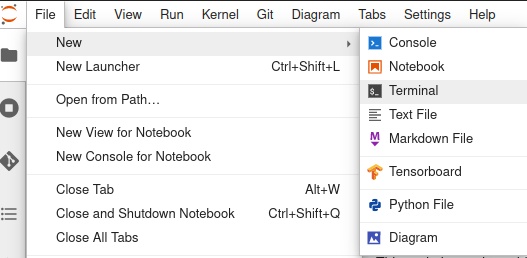



2. Setup the ROS environment again and launch the `roscore` command as follows,


```bash

source /opt/ros/noetic/setup.sh && roscore

```


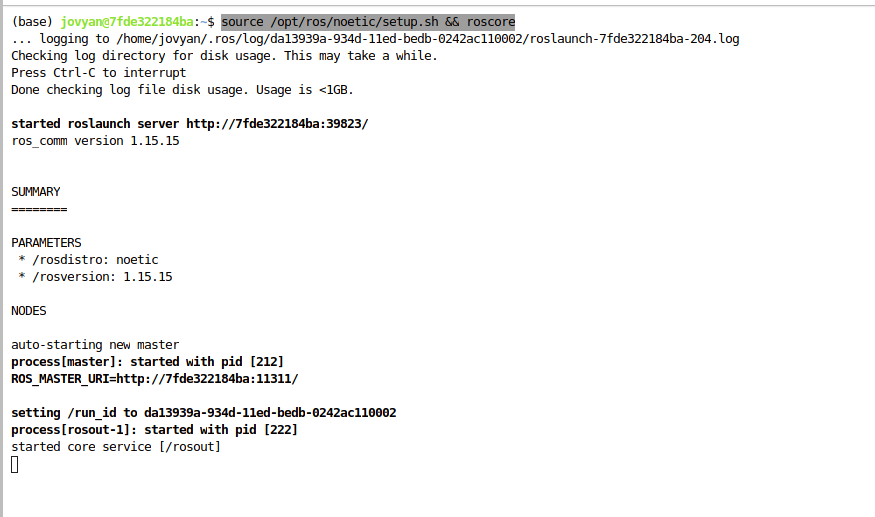

# Initialize a ROS node 

Using rospy libary and it would register the node `subpub_node` with the master node running in the terminal

In [ ]:
rospy.init_node('subpub_node')

The Jupyter-ROS tools help publish and receive messages in a Jupyter notebook.

- **Publishing:** The package contains tools to automatically generate widgets from message definitions. 
- **Receiving:** The jupyter-ros package contains a helper that redirects output to a specific output widget.

# Publisher-Subscriber Communication

## Publisher:
A publisher is a mechanism that is associated with a certain node, which allows us to **publish** information in the form of the **ROS messages** on a certain topic.

A publisher can be created by defining the topic name, message type and queue size or rate at which messsage should be broadcasted.

## Subscriber:
A subscriber is a mechanism that is associated with certain node, which allows us to **subscribe** and to receive the information in the form of the **ROS messages** that is being published over any topic.

Subscriber can be defined using the topic name, message type, callback function (A function which should be executed upon receiving new messasge), and queue size.

The following image visualizes the Publisher and Subscriber communication along with nodes, topics, and the ROS master:

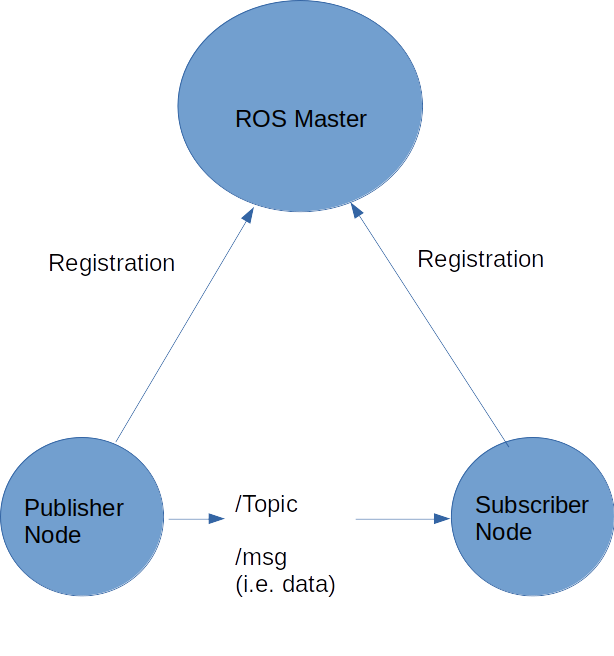

# Publishing to a ROS topic

Now we want to publish `Pose` messages on the ROS Topic `/pose_stream` using the JupyROS library. Those messages types are ROS standart messages that are predefined by the ROS community. You can check the definition of the `Pose` message [here](http://docs.ros.org/en/noetic/api/geometry_msgs/html/msg/Pose.html).

The `Pose` message is defined as 
```
Point position
Quaternion orientation
```
Hence it consists of two other messages.
- [Point](http://docs.ros.org/en/noetic/api/geometry_msgs/html/msg/Point.html)
- [Quaternion](http://docs.ros.org/en/noetic/api/geometry_msgs/html/msg/Quaternion.html)

Please read through these message definitions above, to understand the what the `Pose` message contains.

Now, calling the jupy-ros publisher with the `Pose` message, results in a jupyter widget where one can insert the desired message in the text field. 

The form fields are generated automatically from the message definition.

In [ ]:
jr.publish('/pose_stream', Pose)

Now, enter some values into the form and start to publish this message. Make sure to use a `Rate` of 1. Otherwise your screen might be spammed with messages later on. Now we can start a subscriber in the following section in order to receive these messages.

# Subscribing to a ROS topic

The following code cell is using JupyROS library to subscribe to a ROS topic named `/pose_stream` which is publishing messages of type `Pose` as explained above. The lambda function passed as the third argument to the `.subscriber()` function is the callback function that will be called every time a message is received on the `/pose_stream` topic. The lambda function simply prints the received message for demonstration. In a normal scenario like in a robot, this message would be used to for some further calculations and actions that have to be implemented in the corresponding ROS Node.

To stop subscribing, you can stop this process by clicking on the stop button.

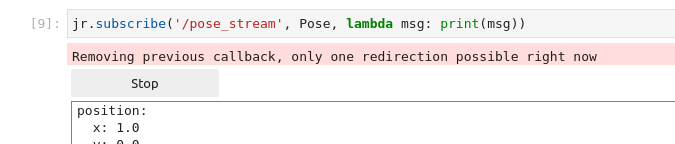

Now execute the following code block and you will see that the messages from the publisher are received.

In [ ]:
jr.subscribe('/pose_stream', Pose, lambda msg: print(msg))

Upon calling the `.subscribe()` function, `jupyter-ros` will create a handle to a [rospy](http://wiki.ros.org/rospy) subscriber thread. Hence, JupyRos wraps the `rospy` functionality and extends it for Jupyter Notebook. Note that we did not use the rospy-way of creating a subscriber. We recommend to have a look on the [official documentation](https://wiki.ros.org/ROS/Tutorials/WritingPublisherSubscriber%28python%29) for rospy, in order to understand how to setup a publisher subscriber in Python. But we will also cover this in the upcoming learning units in this MOOC

# Using Different Messages

We can of course use different message types for the publisher and subscriber. Here in using jupyros, a different message types will result in different form fields. You can try to run the following publishers with the messages
- [Twist](http://docs.ros.org/en/noetic/api/geometry_msgs/html/msg/Twist.html)
- [String](http://docs.ros.org/en/melodic/api/std_msgs/html/msg/String.html)
Now execute the following fields:

In [ ]:
jr.publish('/twist_stream', Twist)

In [ ]:
jr.publish('/string_stream', String)

We can also publish images on a topic. For that purpose we use the message type [sensor_msgs/Image.msg](http://docs.ros.org/en/noetic/api/sensor_msgs/html/msg/Image.html).

Execute the following field and insert the following image path: 
```bash
/home/jovyan/acdc/assets/header_image.png
```

In [ ]:
jr.publish('/image_stream', Image)

## Run the respective subscriber

In [ ]:
jr.subscribe('/pose_stream', Pose, lambda msg: print(msg))

In [ ]:
jr.subscribe('/twist_stream', Twist, lambda msg: print(msg))

In [ ]:
jr.subscribe('/string_stream', String, lambda msg: print(msg))

### Image Subscriber

The simple standart messages can be easily printed using the `print()` statement. However, if we want to visualize a image message types we will need to implement a more advanced callback function. We implemented the function `display_image_msg()` which takes the image message as input and plots the image using [matplotlib' pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) function `imshow()`. Execute the following cells in order to receive the image messages and to visualize them.

In [ ]:
def display_image_msg(img_msg):
    np_image = np.ndarray(shape=(img_msg.height, img_msg.width, 3), dtype=np.dtype("uint8"), buffer=img_msg.data)
    np_image = np_image[...,::-1]
    plt.imshow(np_image)
    plt.show()  
    plt.close()

In [ ]:
jr.subscribe('image_stream', Image, display_image_msg)

# Stop the master 

Now, we are finished with our first ROS tutorial using Jupyter Notebook and Jupyros. We can now go back to the Terminal window and stop the master node by pressing Ctrl + C.


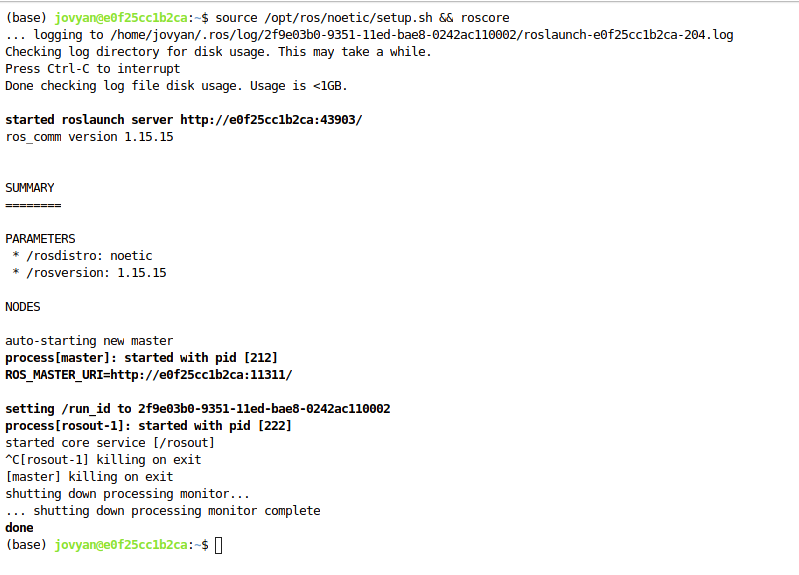

# Wrap up

- You learned about the JupyterROS and that you can create Publishers and Subscribers that use predefined messages
- You learned how to define a publisher to publish on a certain topic with a certain message format
- You learned how to define a subscriber which subscribes to a certain topic
- You learned how to launch the master node from the terminal and how to stop it

## License

MIT License

Copyright 2023 Institute for Automotive Engineering of RWTH Aachen University.